In [19]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Load dataset
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print("Kích thước train:", train_df.shape)
print("Kích thước test:", test_df.shape)
train_df.head()

Kích thước train: (891, 12)
Kích thước test: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Basic info
print("\n🔹 Train Info:")
print(train_df.info())
print("\n🔹 Missing Values:\n", train_df.isnull().sum())
print("\n🔹 Numeric Columns:\n", train_df.select_dtypes(include=[np.number]).columns.tolist())


🔹 Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin         

In [22]:
# Statistical summary
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


/tmp/ipykernel_18765/3406070712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Survived', palette='Set2')


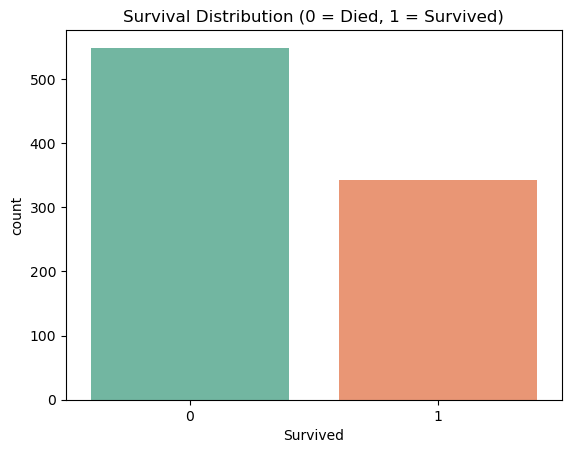

In [23]:
# Target variable distribution
sns.countplot(data=train_df, x='Survived', palette='Set2')
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

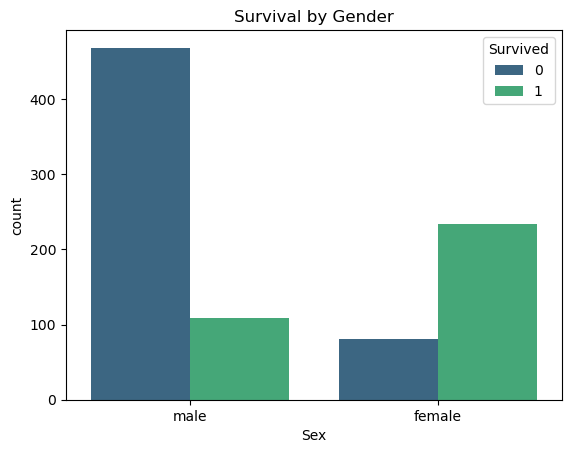

In [24]:
# Compare survival by sex
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title("Survival by Gender")
plt.show()

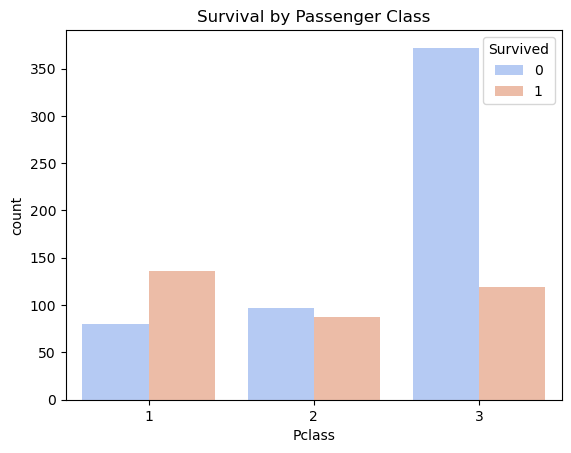

In [25]:
# Survival by Passenger Class
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.show()

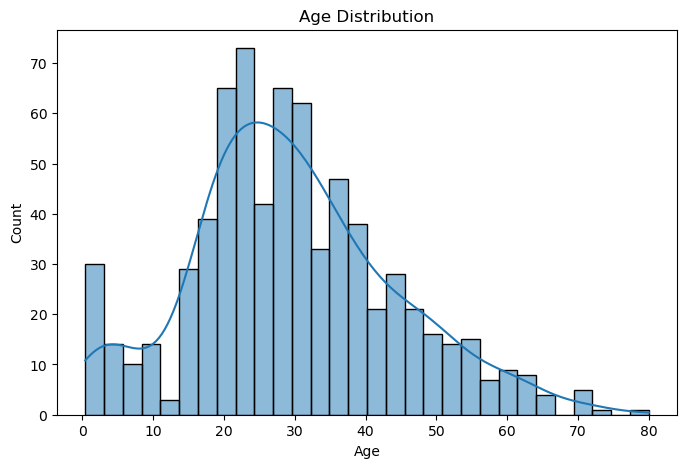

In [26]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

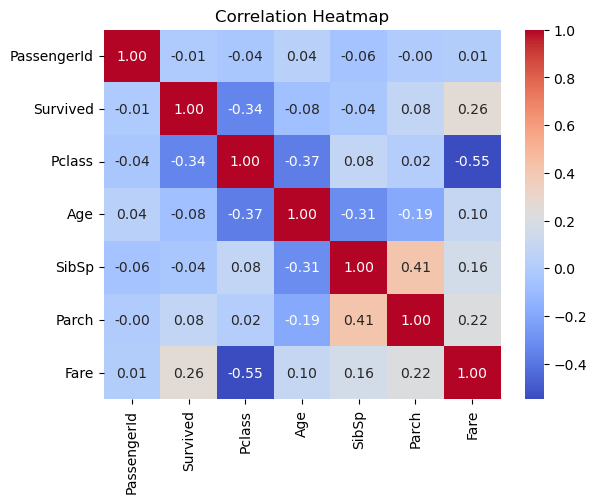

In [27]:
# Correlation heatmap (numeric columns only)
numeric_df = train_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Data Preprocessing

# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop unnecessary columns
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode categorical columns
for col in ['Sex', 'Embarked']:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

/tmp/ipykernel_18765/1360614156.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipykernel_18765/1360614156.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [29]:
# Check after preprocessing
print(train_df.head())
print("\nMissing values after cleaning:\n", train_df.isnull().sum())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

Missing values after cleaning:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [30]:
# Split features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [31]:
# Train SVM (Linear Kernel)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_val_scaled)

In [32]:
# Evaluate Linear SVM
print("🔹 Linear SVM Accuracy:", accuracy_score(y_val, y_pred_linear))
print("\nConfusion Matrix (Linear):\n", confusion_matrix(y_val, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_val, y_pred_linear))

🔹 Linear SVM Accuracy: 0.776536312849162

Confusion Matrix (Linear):
 [[94 16]
 [24 45]]

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [33]:
# Train SVM (RBF Kernel)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_val_scaled)

In [34]:
# Evaluate RBF SVM
print("🔹 RBF SVM Accuracy:", accuracy_score(y_val, y_pred_rbf))
print("\nConfusion Matrix (RBF):\n", confusion_matrix(y_val, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_val, y_pred_rbf))

🔹 RBF SVM Accuracy: 0.8156424581005587

Confusion Matrix (RBF):
 [[101   9]
 [ 24  45]]

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



          Model  Accuracy
0  SVM (Linear)  0.776536
1     SVM (RBF)  0.815642


/tmp/ipykernel_18765/1155897800.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='Accuracy', palette='magma')


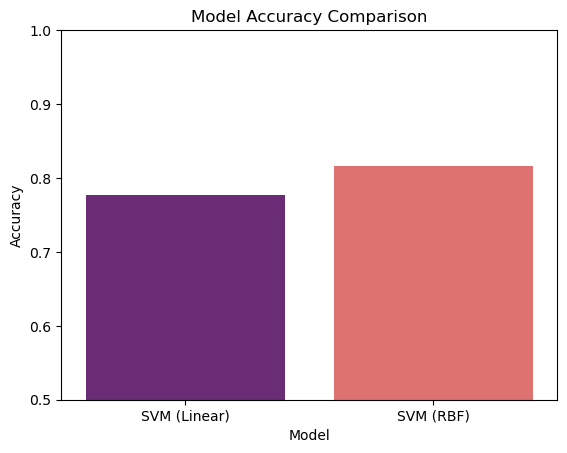

In [35]:
# Compare both models
results = pd.DataFrame({
    'Model': ['SVM (Linear)', 'SVM (RBF)'],
    'Accuracy': [accuracy_score(y_val, y_pred_linear),
                 accuracy_score(y_val, y_pred_rbf)]
})
print(results)

sns.barplot(data=results, x='Model', y='Accuracy', palette='magma')
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.show()

## Summary
- RBF kernel performs better with non-linear relationships.
- RBF may outperform linear on complex data.